### **Dataset Overview**

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv('drive/MyDrive/SEM1 ML PROJECT/Project 2/forestCovType.csv')
# df = pd.read_csv('covtype.csv')


print(df.shape)
df.head()

(581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.columns
df.dtypes
df['Cover_Type'].value_counts(normalize=True)



,proportion
Cover_Type,
2,0.487599
1,0.364605
3,0.061537
7,0.035300
6,0.029891
5,0.016339
4,0.004728


<Axes: >

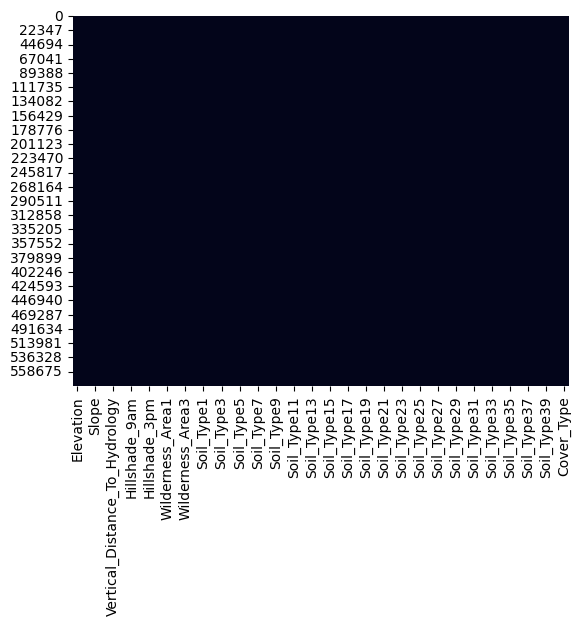

In [ ]:
# Find the total number of missing values in each column
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)


In [ ]:
# Check for duplicates
duplicate = df[df.duplicated()]
duplicate

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


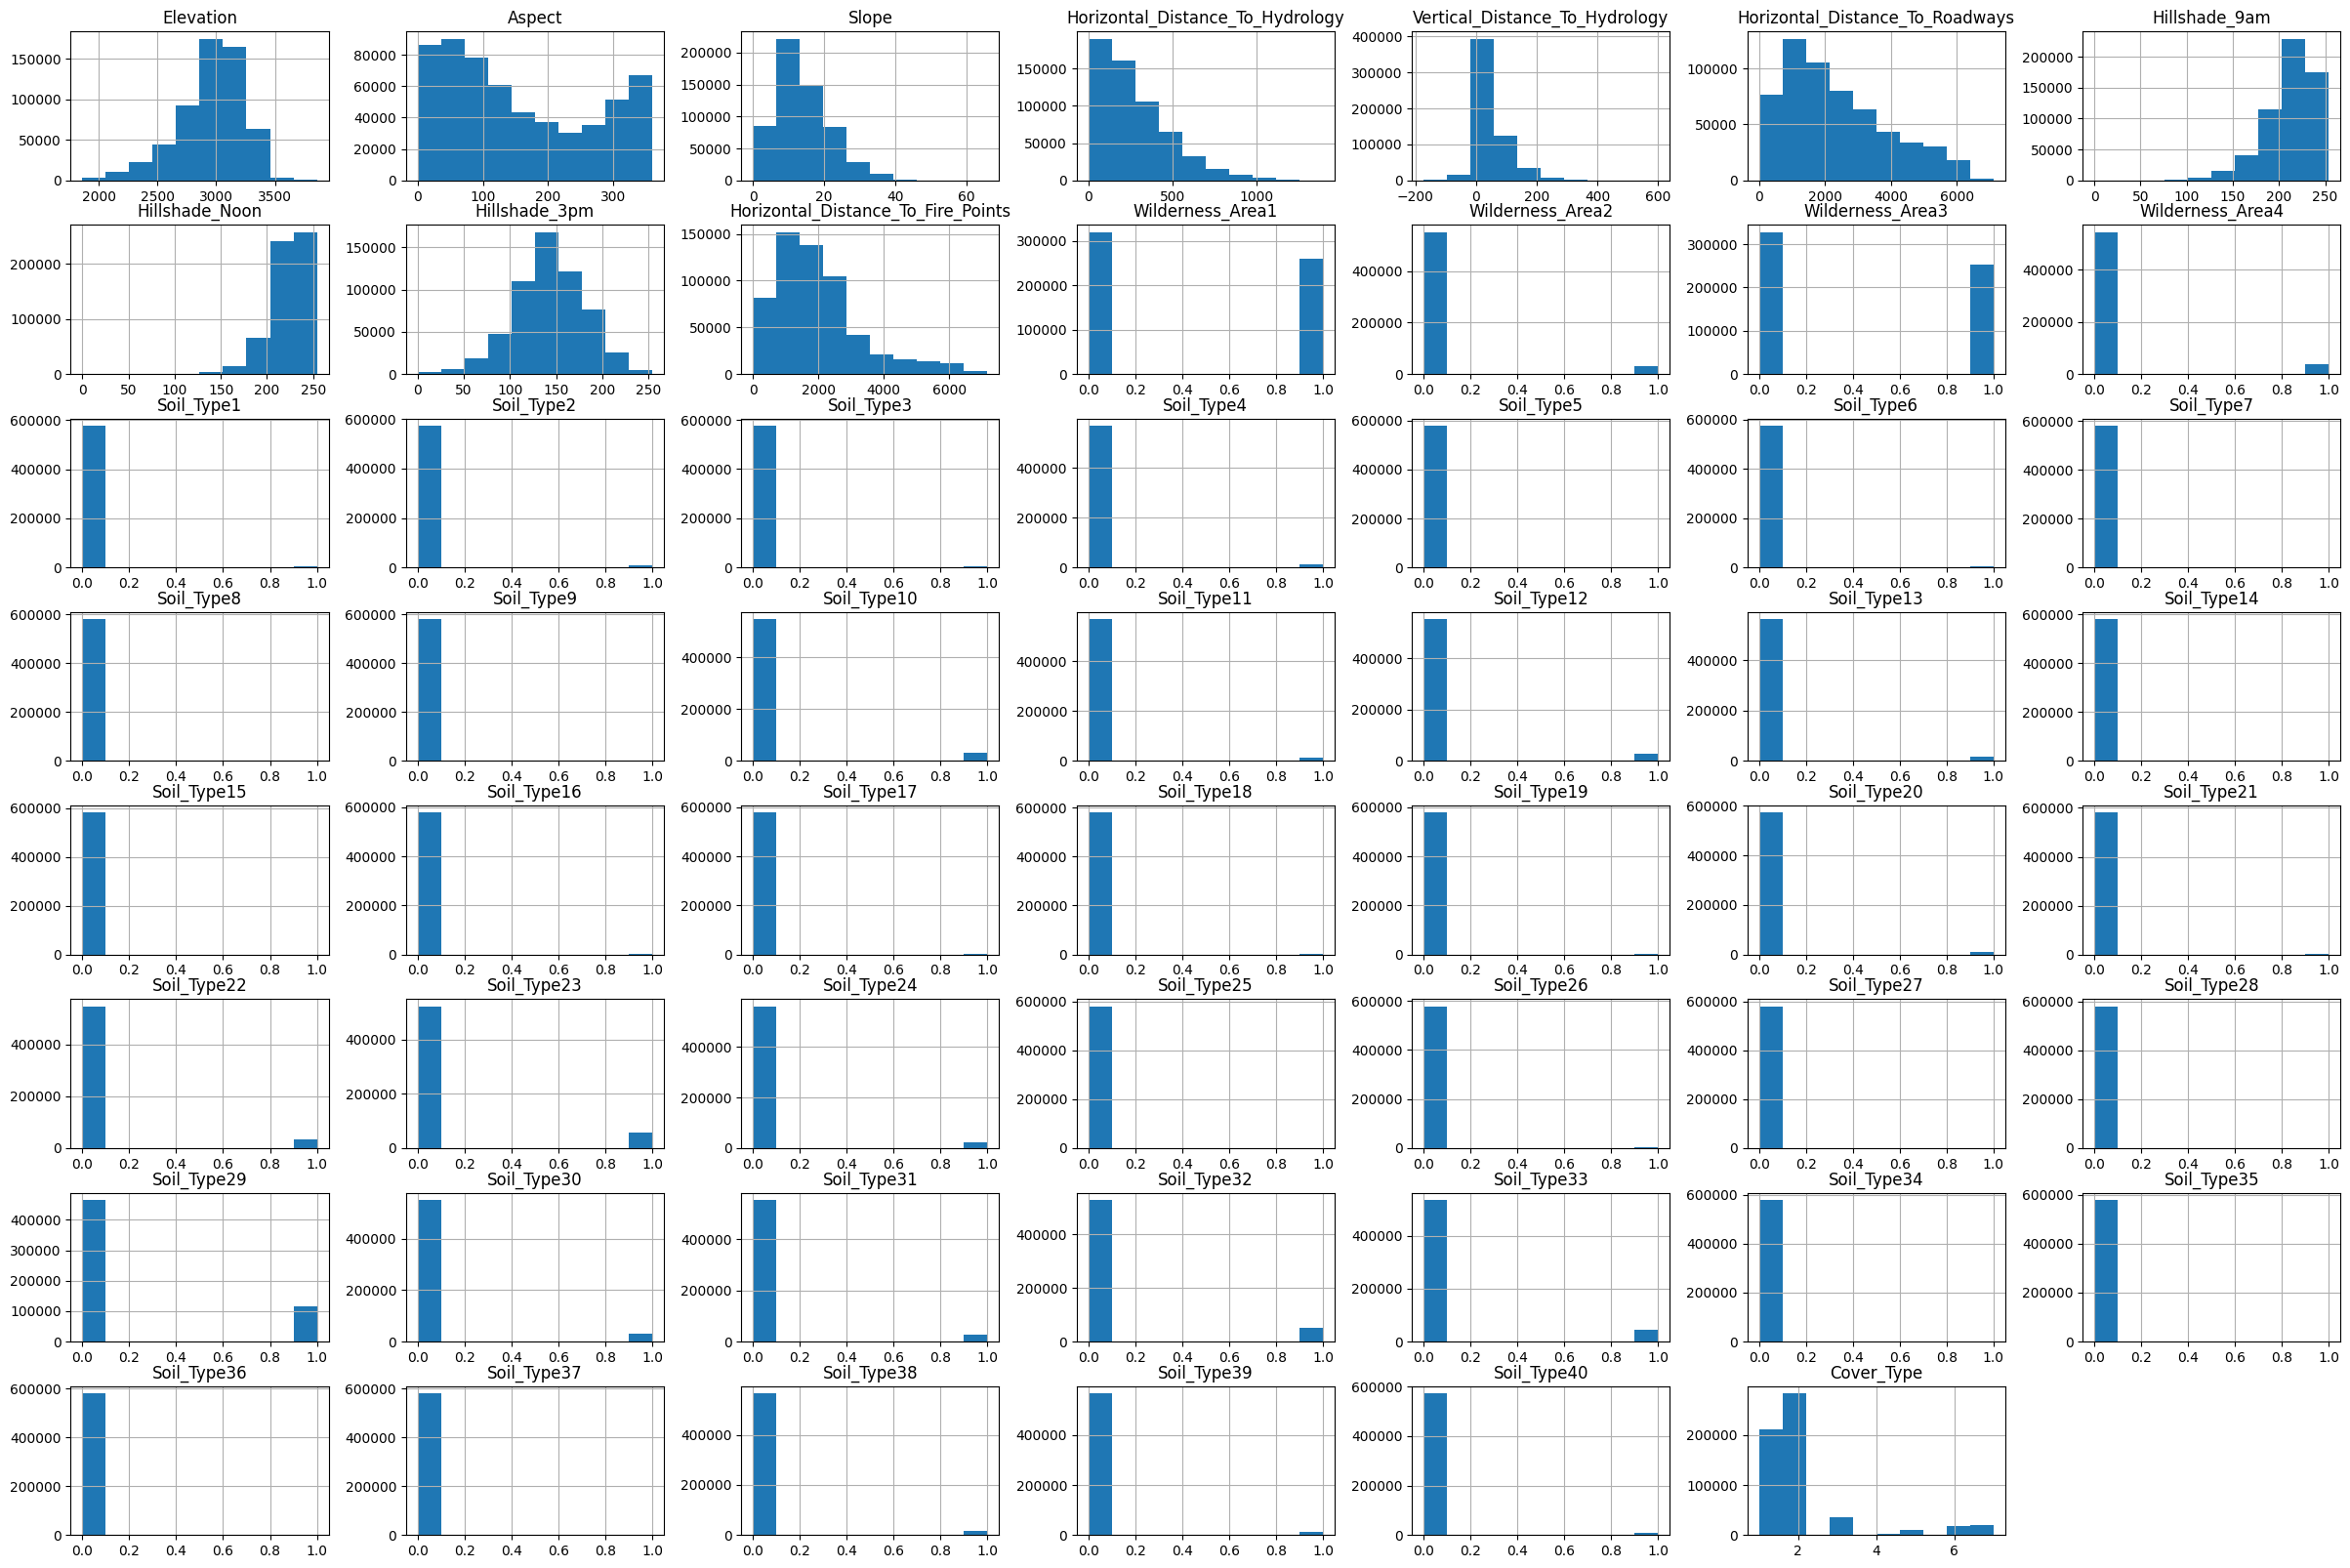

In [ ]:
import matplotlib.pyplot as plt
df.describe()

df.hist(figsize=(30,20))
plt.show()

Categorical-like integer columns: ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
Continuous numeric columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


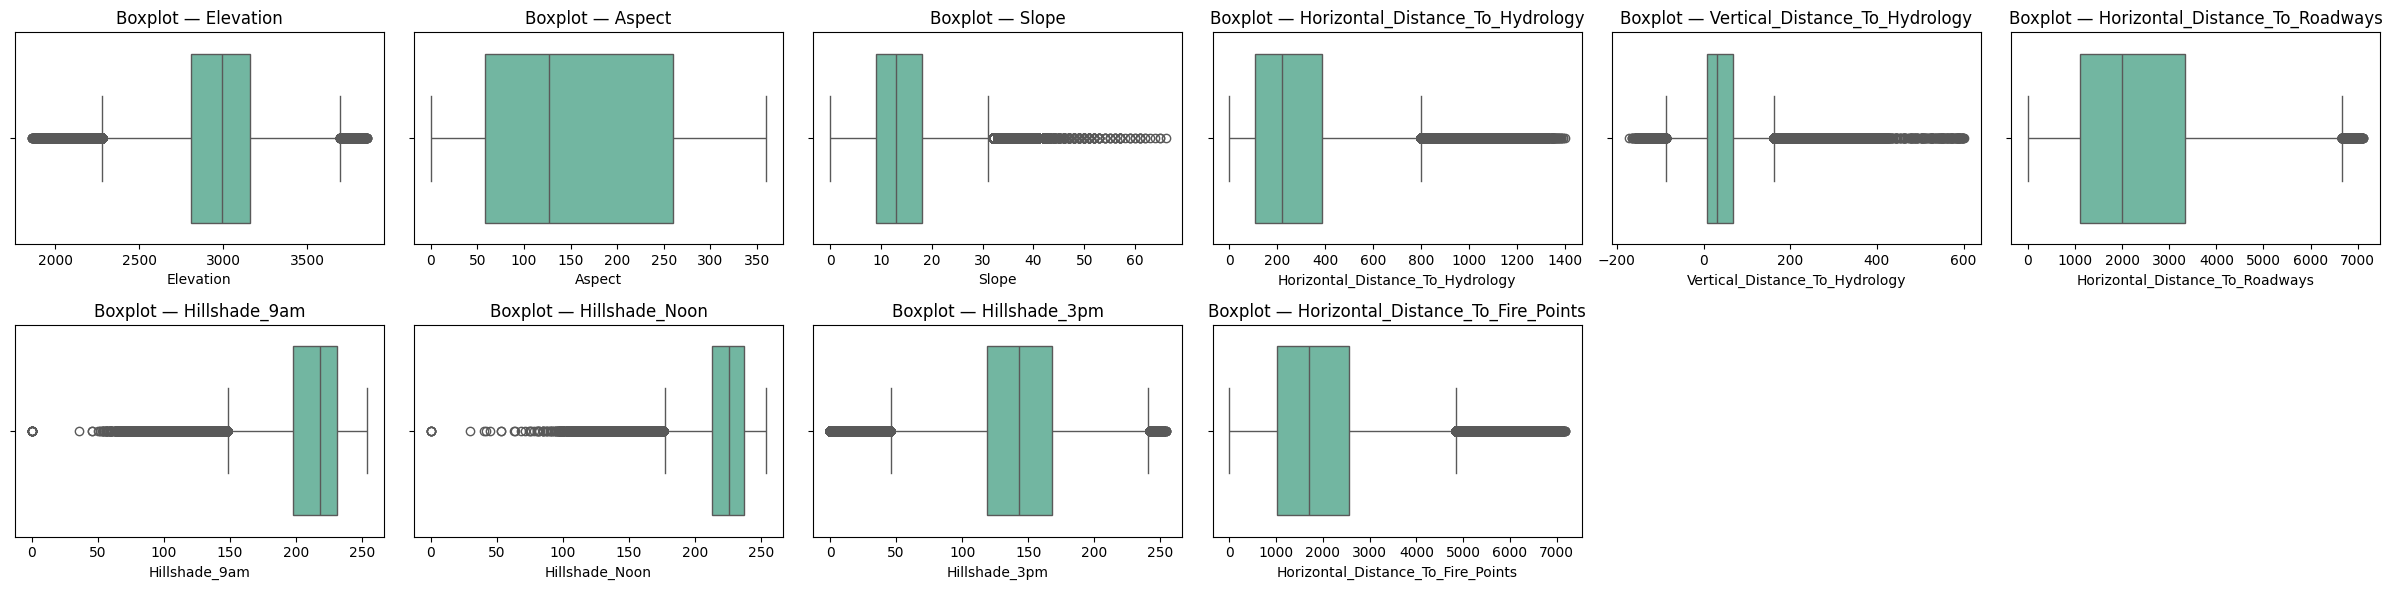

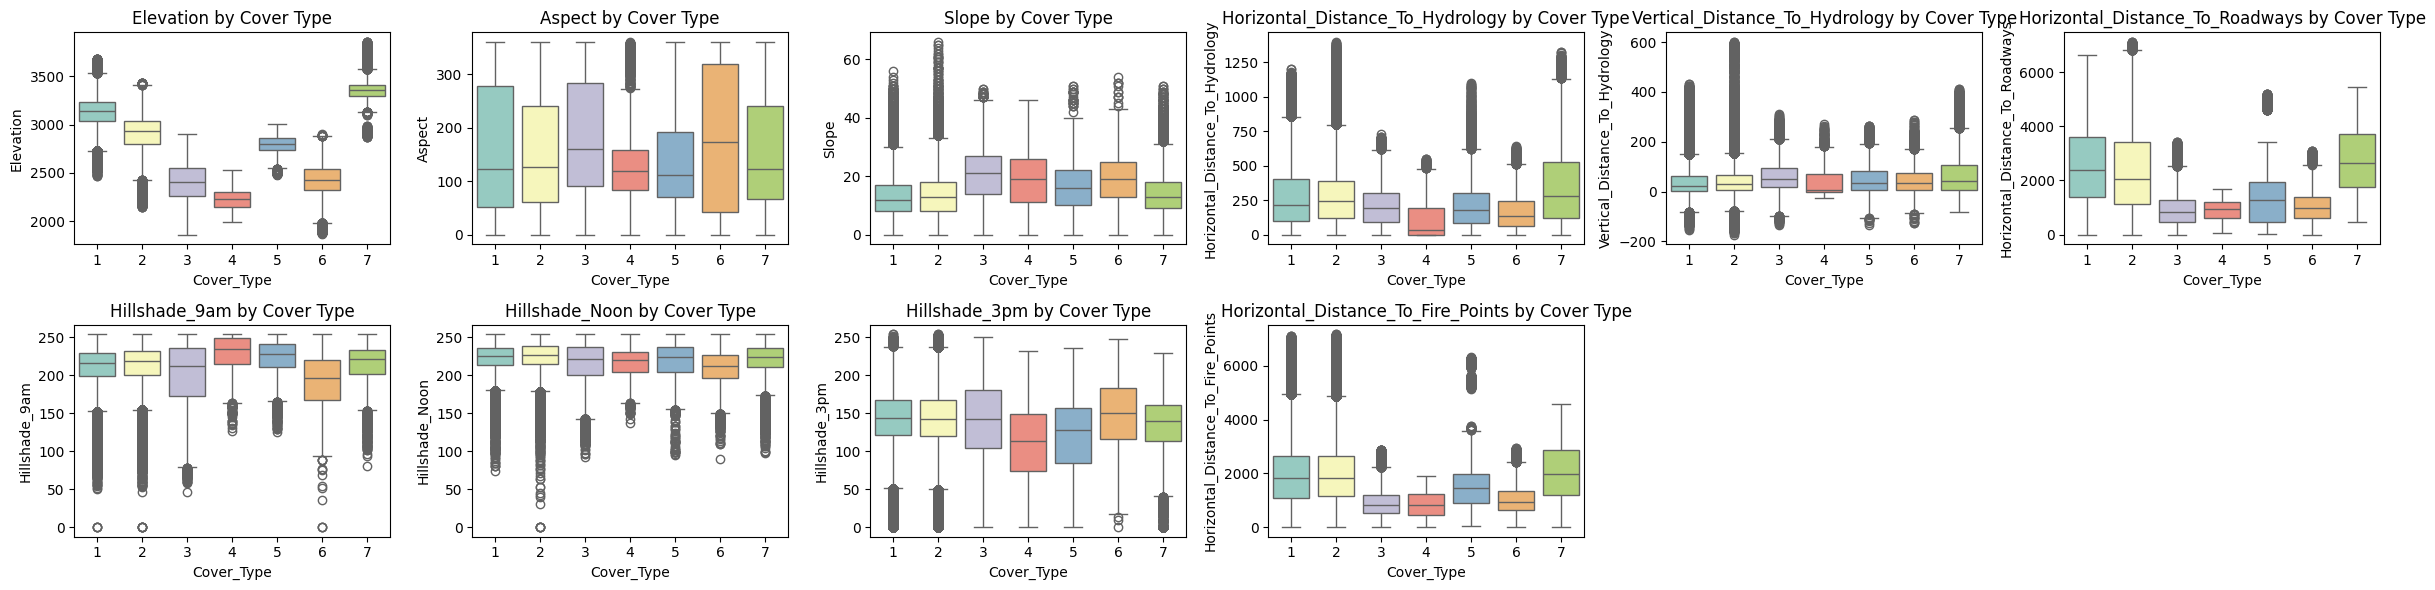

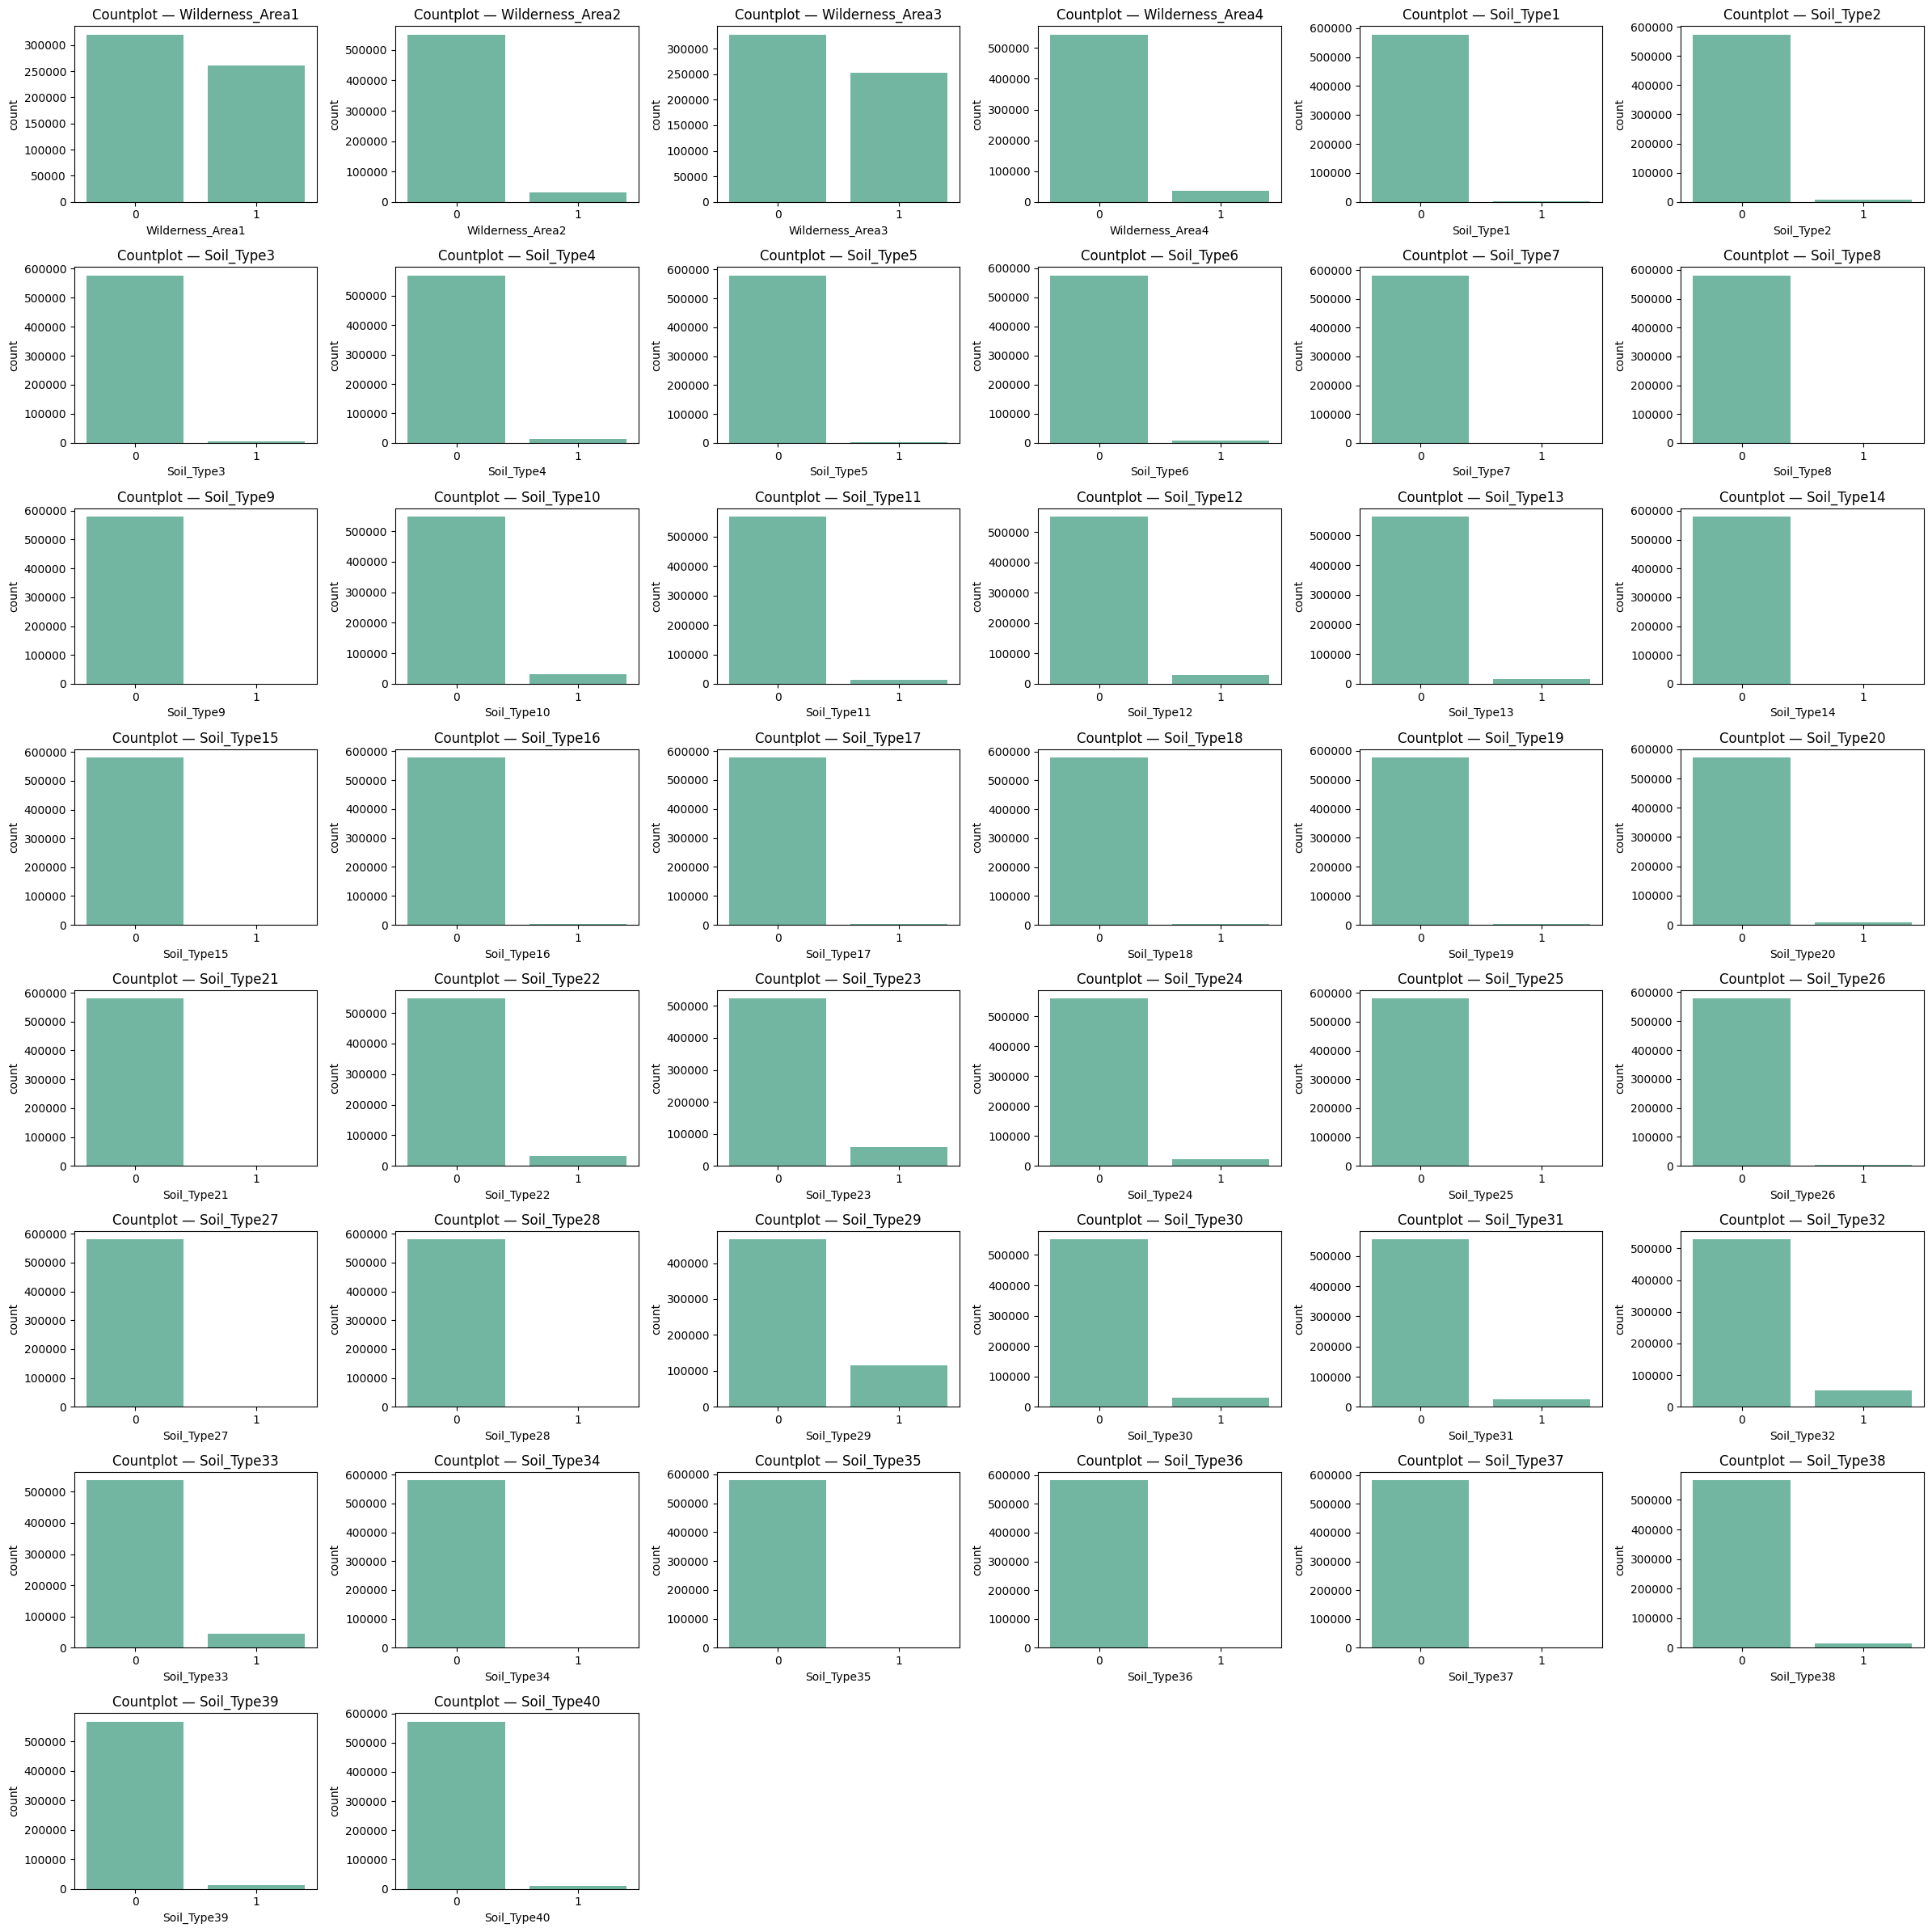

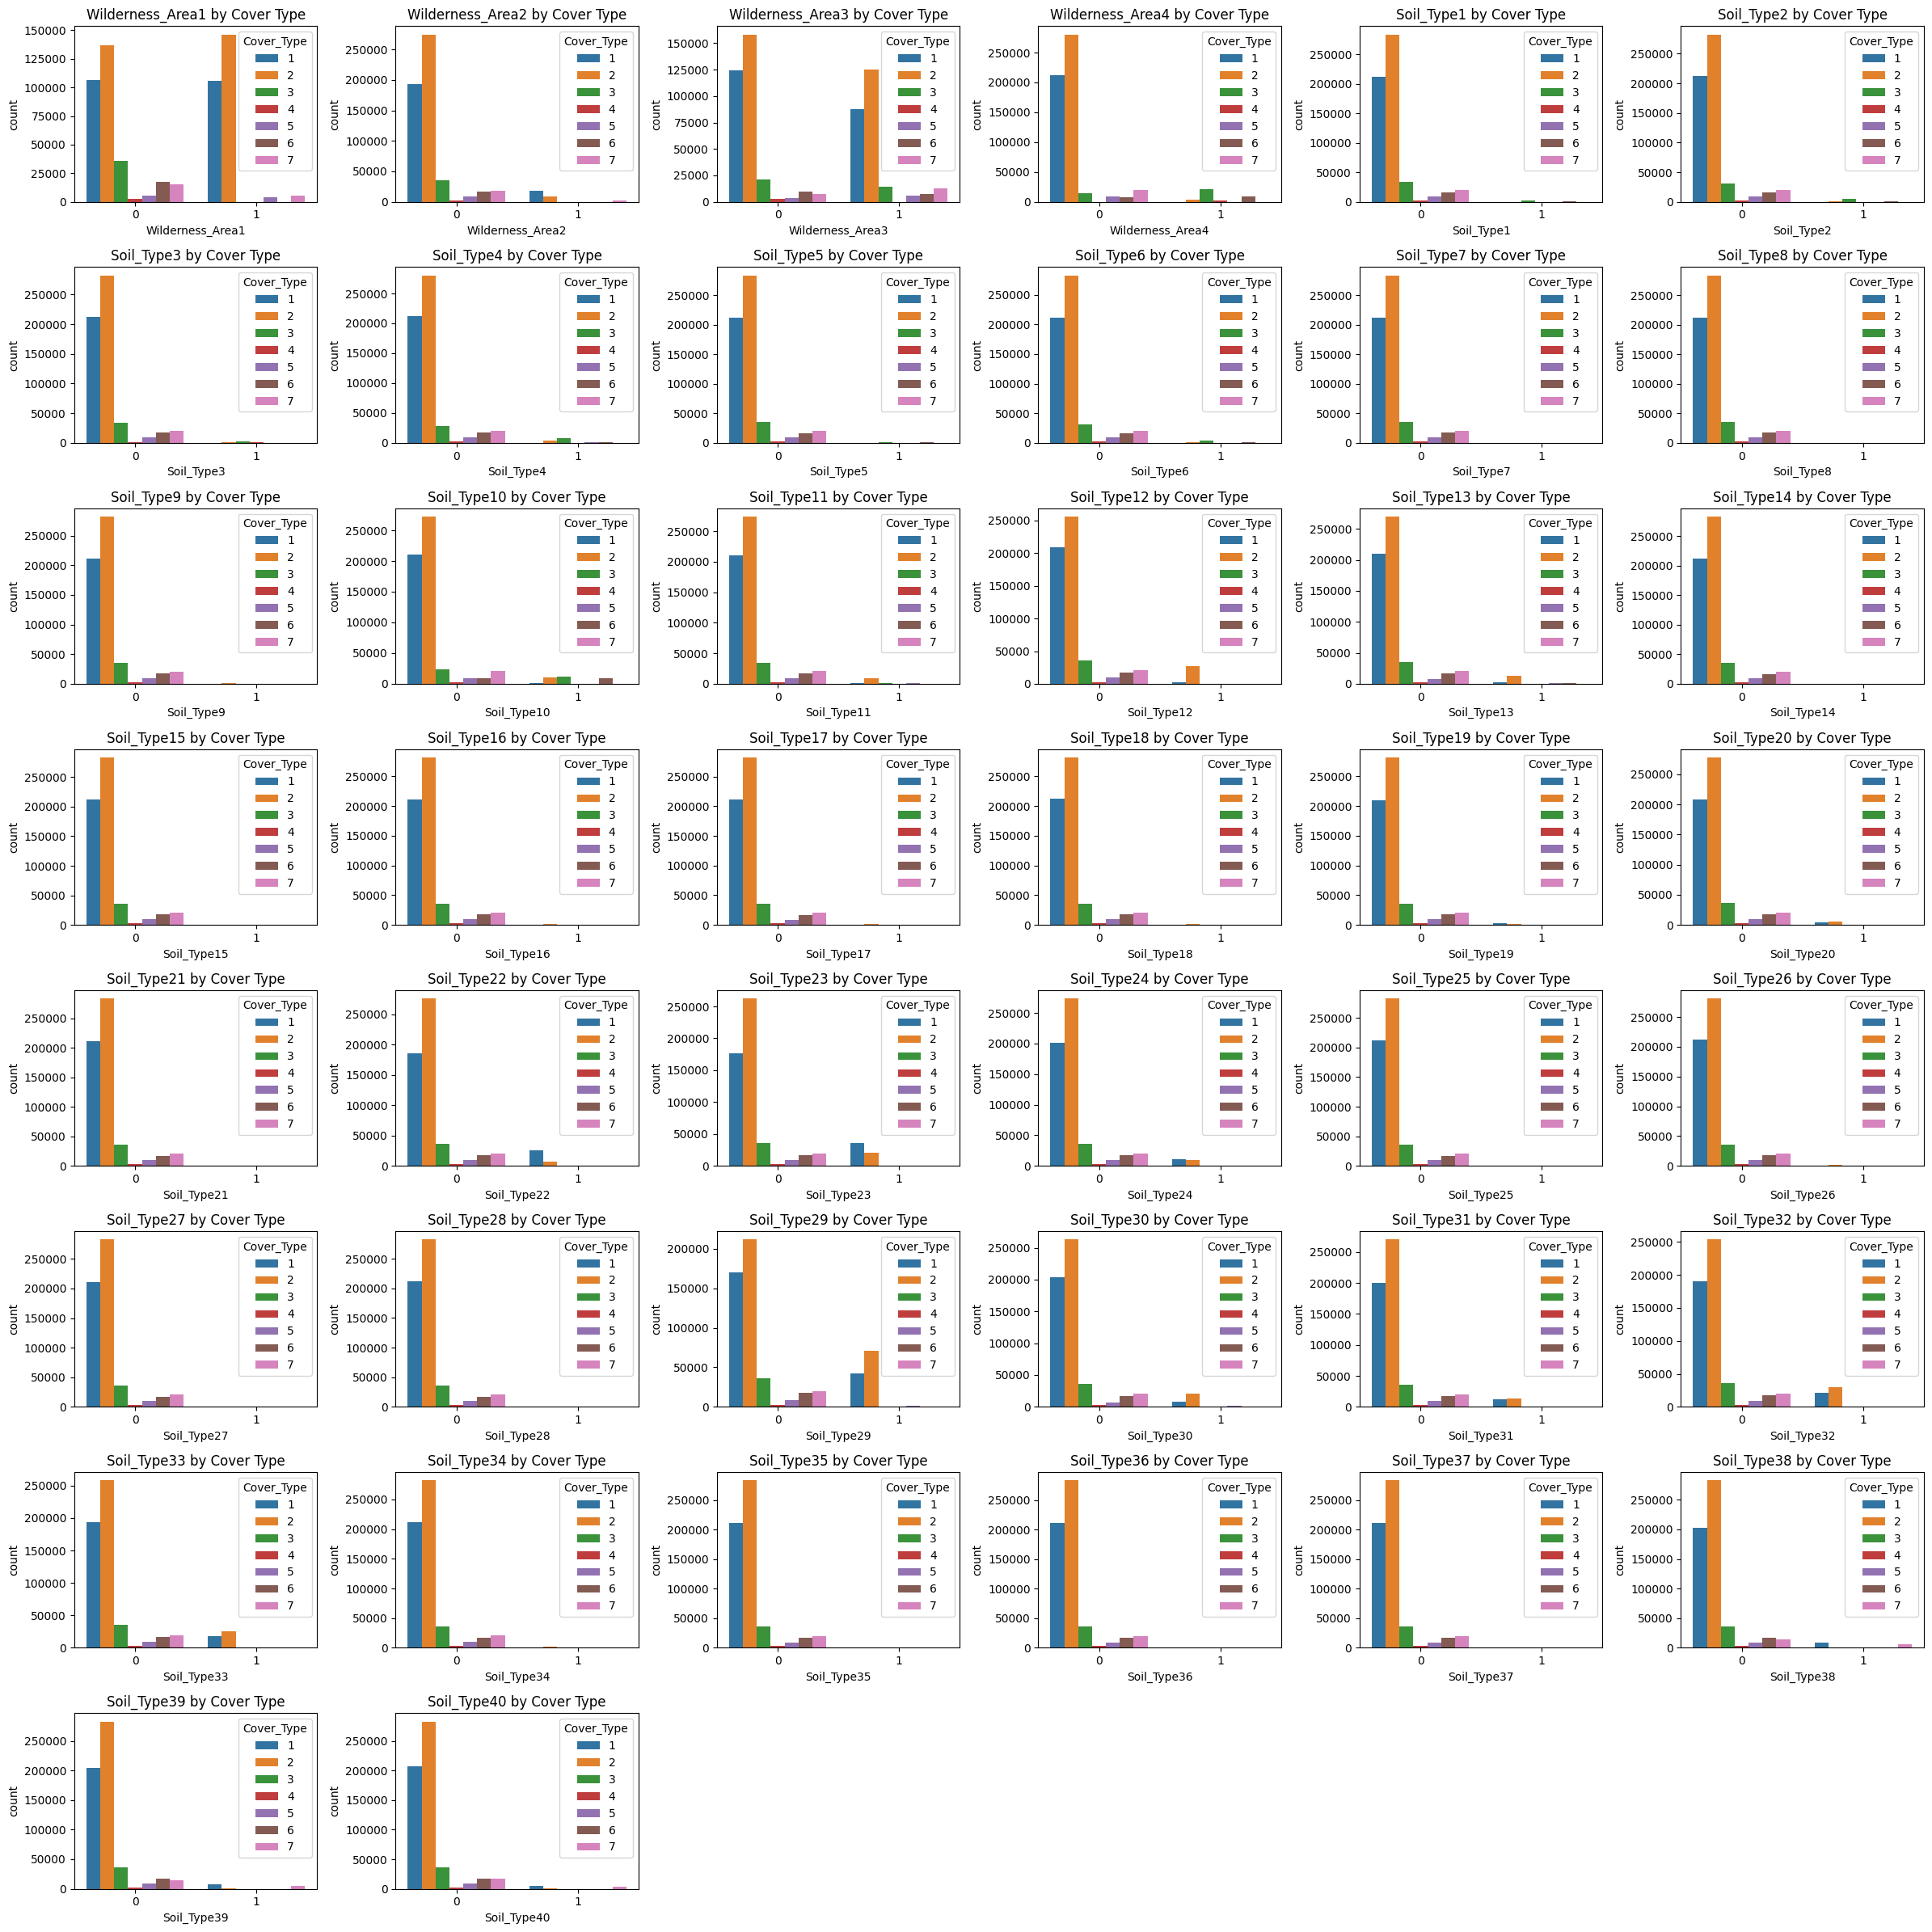

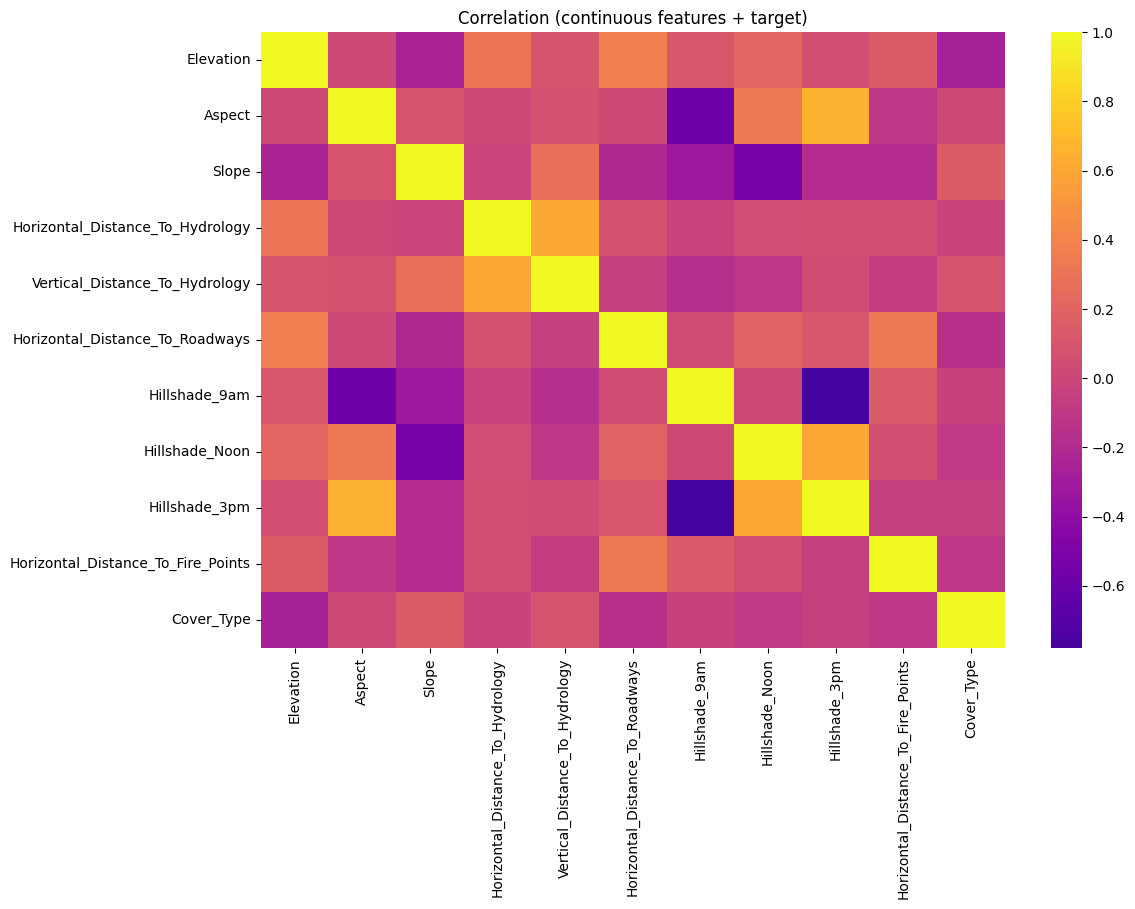


Correlations with Cover_Type:

Cover_Type                            1.000000
Slope                                 0.148285
Vertical_Distance_To_Hydrology        0.081664
Aspect                                0.017080
Horizontal_Distance_To_Hydrology     -0.020317
Hillshade_9am                        -0.035415
Hillshade_3pm                        -0.048290
Hillshade_Noon                       -0.096426
Horizontal_Distance_To_Fire_Points   -0.108936
Horizontal_Distance_To_Roadways      -0.153450
Elevation                            -0.269554
Name: Cover_Type, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# -------------------------------
# Detect categorical integer columns
# -------------------------------
def detect_categorical_integer_cols(df, threshold_unique=10):
    return [
        col for col in df.select_dtypes(include=['int64','int32']).columns
        if df[col].nunique() <= threshold_unique
    ]

# -------------------------------
# Grid plot
# -------------------------------
def plot_grid(plots, titles, cols=6, figscale=(4,3)):
    if len(plots) == 0:
        return
    rows = math.ceil(len(plots) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*figscale[0], rows*figscale[1]))
    axes = axes.flatten()

    for i, (plot_fn, title) in enumerate(zip(plots, titles)):
        ax = axes[i]
        plot_fn(ax)
        ax.set_title(title)

    for j in range(len(plots), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# -------------------------------
# Identify feature types
# -------------------------------
categorical_int_cols = detect_categorical_integer_cols(df)

# Remove Cover_Type if present
if 'Cover_Type' in categorical_int_cols:
    categorical_int_cols.remove('Cover_Type')

continuous_numeric_cols = [
    col for col in df.select_dtypes(include=['number']).columns
    if col not in categorical_int_cols + ['Cover_Type']
]

print("Categorical-like integer columns:", categorical_int_cols)
print("Continuous numeric columns:", continuous_numeric_cols)

# ============================================================
# 1) Boxplots for continuous numeric columns (grid)
# ============================================================
plots = []
titles = []
single_color = sns.color_palette("Set2")[0]

for col in continuous_numeric_cols:
    plots.append(lambda ax, c=col: sns.boxplot(x=df[c], ax=ax, color=single_color))
    titles.append(f"Boxplot — {col}")

# use default cols=6
plot_grid(plots, titles)

# ============================================================
# 2) Continuous features vs Cover_Type (grid)
# ============================================================
plots = []
titles = []

for col in continuous_numeric_cols:
    def plot_fn(ax, c=col):
        sns.boxplot(
            x='Cover_Type',
            y=c,
            data=df,
            hue='Cover_Type',
            palette="Set3",
            dodge=False,
            ax=ax
        )
        if ax.get_legend() is not None:
            ax.get_legend().remove()

    plots.append(plot_fn)
    titles.append(f"{col} by Cover Type")

# use default cols=6
plot_grid(plots, titles)


# ============================================================
# 3) Countplots for categorical-like integer columns (grid)
# ============================================================
plots = []
titles = []

for col in categorical_int_cols:
    plots.append(lambda ax, c=col: sns.countplot(x=c, data=df, ax=ax, color=single_color))
    titles.append(f"Countplot — {col}")

# use default cols=6
plot_grid(plots, titles)

# ============================================================
# 4) Categorical vs Cover_Type (grid)
# ============================================================
plots = []
titles = []

for col in categorical_int_cols:
    plots.append(lambda ax, c=col: sns.countplot(x=c, hue='Cover_Type', data=df, ax=ax, palette="tab10"))
    titles.append(f"{col} by Cover Type")

# use default cols=6
plot_grid(plots, titles)

# ============================================================
# 5) Correlation heatmap
# ============================================================
if continuous_numeric_cols:
    plt.figure(figsize=(12,8))
    corr = df[continuous_numeric_cols + ['Cover_Type']].corr()
    sns.heatmap(corr, annot=False, cmap="plasma", center=0)
    plt.title("Correlation (continuous features + target)")
    plt.show()

    print("\nCorrelations with Cover_Type:\n")
    print(corr['Cover_Type'].sort_values(ascending=False))


### **Processing**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
)

from sklearn.linear_model import LogisticRegression

In [8]:
# -----------------------
# Prepare data (Multiclass: 7 classes)
# -----------------------
X = df.drop('Cover_Type', axis=1)      # <-- ForestCoverType target column
y = df['Cover_Type']                   # values: 1–7

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("\nTrain class distribution:")
print(y_train.value_counts(normalize=True))

# -----------------------
# Scaling
# -----------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------
# CV (for ML models)
# -----------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = 'f1_macro'         # <-- multiclass recommended metric

# -----------------------
# Multiclass Evaluation Function
# -----------------------
def evaluate_model(estimator, X_test, y_test, name="Model"):
    """
    Multiclass evaluation – no AUC.
    """
    y_pred = estimator.predict(X_test)

    print(f"\n--- {name} evaluation ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("F1 Macro :", f1_score(y_test, y_pred, average='macro'))
    print("F1 Micro :", f1_score(y_test, y_pred, average='micro'))
    print("F1 Weighted :", f1_score(y_test, y_pred, average='weighted'))

    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=False, cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Train shape: (464809, 54) Test shape: (116203, 54)

Train class distribution:
Cover_Type
2    0.487598
1    0.364606
3    0.061537
7    0.035301
6    0.029892
5    0.016338
4    0.004729
Name: proportion, dtype: float64


### **Logistic Regression**

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression (Multiclass) ===
Best CV score: 0.532794847299513
Best params: {'clf__C': 1, 'clf__class_weight': None}

--- Logistic Regression (Multiclass) evaluation ---
Accuracy : 0.7235699594674836
F1 Macro : 0.531286111982544
F1 Micro : 0.7235699594674836
F1 Weighted : 0.7139804512431667

Classification report:
              precision    recall  f1-score   support

           1     0.7109    0.6972    0.7040     42368
           2     0.7464    0.7999    0.7722     56661
           3     0.6787    0.8009    0.7347      7151
           4     0.6091    0.4372    0.5090       549
           5     0.1667    0.0058    0.0112      1899
           6     0.4971    0.2753    0.3543      3473
           7     0.7346    0.5568    0.6335      4102

    accuracy                         0.7236    116203
   macro avg     0.5919    0.5104    0.5313    116203
weighted avg     0.7113    0.7236    0.7140    116203



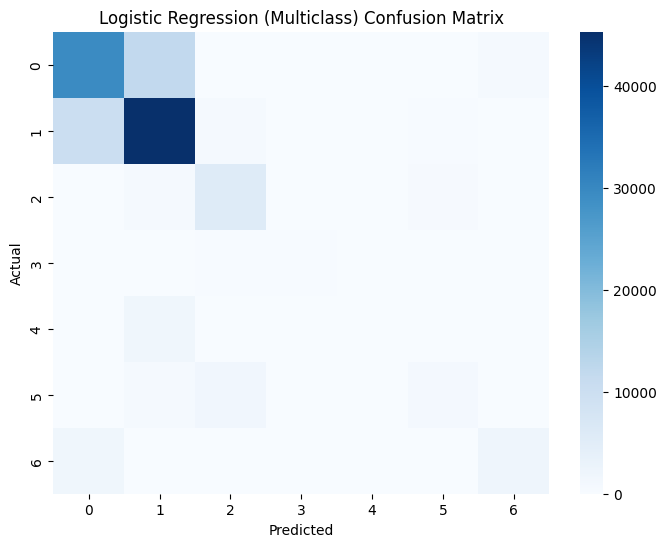

In [ ]:
# -----------------------
# Logistic Regression (Grid Search)
# -----------------------
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=5000, multi_class='multinomial', solver='lbfgs'))
])

param_grid_lr = {
    'clf__C': [0.1, 1],
    'clf__class_weight': [None, 'balanced']   # balanced works for multiclass too
}

# Use the multiclass scoring defined earlier: scoring = 'f1_macro'
gs_lr = GridSearchCV(
    pipe_lr,
    param_grid_lr,
    cv=cv,
    scoring=scoring,
    n_jobs=-1,
    verbose=1
)

# Fit on raw X_train (pipeline will scale)
gs_lr.fit(X_train, y_train)

print("\n=== Logistic Regression (Multiclass) ===")
print("Best CV score:", gs_lr.best_score_)
print("Best params:", gs_lr.best_params_)

# evaluate_model expects an estimator that implements .predict(X)
# Pipeline includes scaler so we can pass raw X_test here
evaluate_model(gs_lr.best_estimator_, X_test, y_test, name="Logistic Regression (Multiclass)")


### **KMeans Algo**


=== KMeans Clustering Experiments (Multiclass) ===

KMeans Evaluation Summary:
 n_clusters  Accuracy  F1_macro  Silhouette
          7  0.566767  0.242596    0.147300
          8  0.548136  0.222182    0.135252
          9  0.533936  0.201394    0.137486

=== Best KMeans Model Evaluation ===
Best n_clusters: 7
Best F1 (macro): 0.2425956218145627


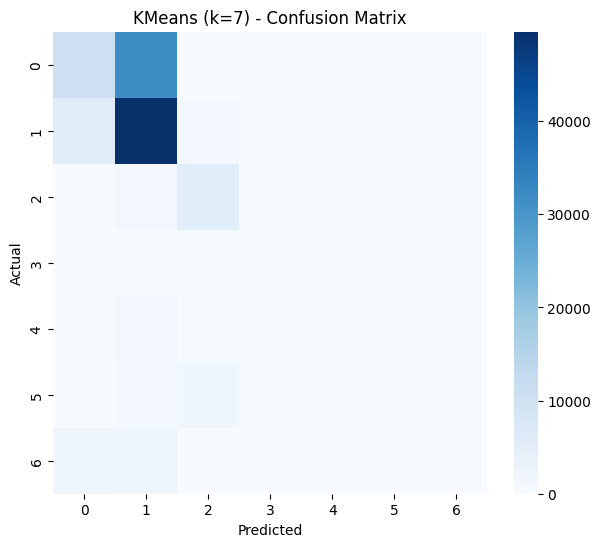


Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.25      0.35     42368
           2       0.56      0.88      0.69     56661
           3       0.57      0.78      0.66      7151
           4       0.00      0.00      0.00       549
           5       0.00      0.00      0.00      1899
           6       0.00      0.00      0.00      3473
           7       0.00      0.00      0.00      4102

    accuracy                           0.57    116203
   macro avg       0.25      0.27      0.24    116203
weighted avg       0.52      0.57      0.50    116203



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# -----------------------
# KMeans
# -----------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    silhouette_score
)

# Try values around the true class count (7)
k_values = [7, 8, 9]

def map_clusters_to_labels(cluster_labels, true_labels):
    """Map each cluster to the majority true class label."""
    mapping = {}
    for c in np.unique(cluster_labels):
        mask = cluster_labels == c
        majority = np.bincount(true_labels[mask]).argmax()
        mapping[c] = majority
    return mapping

print("\n=== KMeans Clustering Experiments (Multiclass) ===")

best_km = None
best_f1 = -1
best_mapping = None

results = []   # k, accuracy, f1_macro, silhouette

for k in k_values:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(X_train_scaled)

    # map clusters → labels using train set
    train_clusters = km.labels_
    mapping = map_clusters_to_labels(train_clusters, y_train.values)

    # predict on test set (cluster → label)
    test_clusters = km.predict(X_test_scaled)
    y_pred = np.array([mapping[c] for c in test_clusters])

    # evaluate
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    sil = silhouette_score(X_test_scaled, test_clusters)

    results.append([k, acc, f1_macro, sil])

    # track best F1 model
    if f1_macro > best_f1:
        best_f1 = f1_macro
        best_km = km
        best_mapping = mapping.copy()

# -----------------------
# Show summary table
# -----------------------
results_df = pd.DataFrame(
    results,
    columns=["n_clusters", "Accuracy", "F1_macro", "Silhouette"]
)

print("\nKMeans Evaluation Summary:")
print(results_df.to_string(index=False))

# -----------------------
# Evaluate best KMeans
# -----------------------
print("\n=== Best KMeans Model Evaluation ===")
print("Best n_clusters:", best_km.n_clusters)
print("Best F1 (macro):", best_f1)

# predict again using best model
best_test_clusters = best_km.predict(X_test_scaled)
best_y_pred = np.array([best_mapping[c] for c in best_test_clusters])

# Confusion matrix (manually, not evaluate_model)
cm = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title(f"KMeans (k={best_km.n_clusters}) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, best_y_pred))


### **GMM Implementation**


=== GMM Clustering Experiments (Multiclass) ===

GMM Evaluation Summary:
 n_components  Accuracy  F1_macro  Silhouette
            7  0.551741  0.247057    0.079191
            8  0.550227  0.228392    0.138742
            9  0.572756  0.243187    0.101033

=== Best GMM Model Evaluation ===
Best n_components: 7
Best F1 (macro)  : 0.2470572254368181


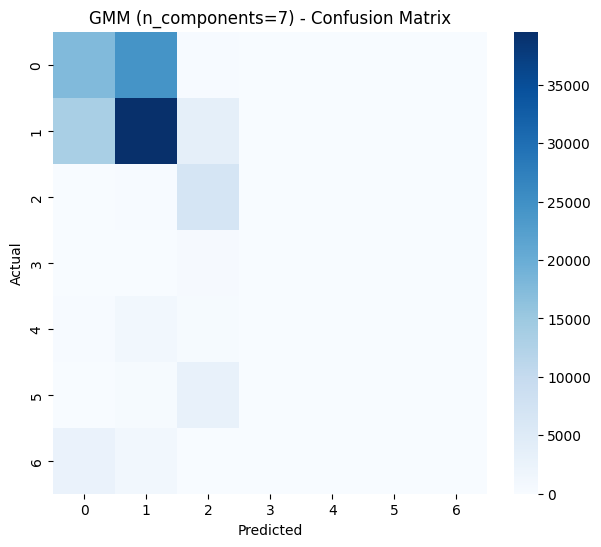


Classification Report:
              precision    recall  f1-score   support

           1     0.5175    0.4179    0.4624     42368
           2     0.5876    0.6977    0.6379     56661
           3     0.4675    0.9615    0.6291      7151
           4     0.0000    0.0000    0.0000       549
           5     0.0000    0.0000    0.0000      1899
           6     0.0000    0.0000    0.0000      3473
           7     0.0000    0.0000    0.0000      4102

    accuracy                         0.5517    116203
   macro avg     0.2246    0.2967    0.2471    116203
weighted avg     0.5040    0.5517    0.5184    116203



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# -----------------------
# GMM
# -----------------------
from sklearn.mixture import GaussianMixture

# Try values around 7 (true class count)
gmm_components = [7, 8, 9]

def map_components_to_labels(component_labels, true_labels):
    """Map each GMM component to the majority true class label."""
    mapping = {}
    for comp in np.unique(component_labels):
        mask = (component_labels == comp)
        majority = np.bincount(true_labels[mask]).argmax()
        mapping[comp] = majority
    return mapping

print("\n=== GMM Clustering Experiments (Multiclass) ===")

best_gmm = None
best_f1 = -1
best_mapping = None

gmm_results = []    # store [k, accuracy, f1_macro, silhouette]

for k in gmm_components:

    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',
        n_init=10,
        random_state=42
    )
    gmm.fit(X_train_scaled)

    # component assignments on train
    train_components = gmm.predict(X_train_scaled)
    mapping = map_components_to_labels(train_components, y_train.values)

    # apply mapping to test set
    test_components = gmm.predict(X_test_scaled)
    y_pred = np.array([mapping[c] for c in test_components])

    # metrics (macro for multiclass)
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    sil = silhouette_score(X_test_scaled, test_components)

    gmm_results.append([k, acc, f1_macro, sil])

    # pick best by macro F1
    if f1_macro > best_f1:
        best_f1 = f1_macro
        best_gmm = gmm
        best_mapping = mapping.copy()

# -----------------------
# Results Table
# -----------------------
gmm_results_df = pd.DataFrame(
    gmm_results,
    columns=["n_components", "Accuracy", "F1_macro", "Silhouette"]
)

print("\nGMM Evaluation Summary:")
print(gmm_results_df.to_string(index=False))

# -----------------------
# Best GMM Evaluation
# -----------------------
print("\n=== Best GMM Model Evaluation ===")
print("Best n_components:", best_gmm.n_components)
print("Best F1 (macro)  :", best_f1)

# Predict final labels
best_test_components = best_gmm.predict(X_test_scaled)
best_y_pred = np.array([best_mapping[c] for c in best_test_components])

# Confusion matrix
cm = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title(f"GMM (n_components={best_gmm.n_components}) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, best_y_pred, digits=4))


### **SVM With Gridsearchcv**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    f1_score
)

# -----------------------
# Pipeline
# -----------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# -----------------------
# Parameter Grid (conditional)
# -----------------------
param_grid = [
    {
        "svc__kernel": ["linear"],
        "svc__C": [0.1, 1, 10],
        "svc__class_weight": [None, "balanced"]
    },
    {
        "svc__kernel": ["rbf"],
        "svc__C": [0.1, 1, 10],
        "svc__class_weight": [None, "balanced"],
        "svc__gamma": ["scale", "auto"]
    }
]

# -----------------------
# Cross-validation and GridSearchCV
# -----------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1_macro",     # multiclass-appropriate
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Fit on training data
gs.fit(X_train, y_train)

# -----------------------
# Best Results
# -----------------------
print("\n=== GridSearchCV Results ===")
print("Best CV (f1_macro)  :", gs.best_score_)
print("Best parameters     :", gs.best_params_)

# -----------------------
# Test Set Evaluation
# -----------------------
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
test_f1_macro = f1_score(y_test, y_pred, average="macro")

print("\n=== Test Set Performance ===")
print("Test Accuracy :", test_acc)
print("Test F1 Macro :", test_f1_macro)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# -----------------------
# Confusion Matrix
# -----------------------
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(np.concatenate([y_test, y_pred]))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("SVC Confusion Matrix (ForestCoverType)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 18 candidates, totalling 90 fits


### **Neural Network with Gridsearchcv**

Fitting 5 folds for each of 3 candidates, totalling 15 fits

=== MLPClassifier (Multiclass) ===
Best CV score: 0.8372431916154144
Best params: {'clf__activation': 'relu', 'clf__early_stopping': True, 'clf__hidden_layer_sizes': (256,), 'clf__solver': 'adam'}

--- MLPClassifier (Multiclass) evaluation ---
Accuracy : 0.8879460943349139
F1 Macro : 0.8355238460957578
F1 Micro : 0.8879460943349139
F1 Weighted : 0.8872179581322963

Classification report:
              precision    recall  f1-score   support

           1     0.8988    0.8676    0.8830     42368
           2     0.8912    0.9196    0.9052     56661
           3     0.8395    0.9169    0.8765      7151
           4     0.7871    0.8415    0.8134       549
           5     0.8138    0.6330    0.7121      1899
           6     0.8062    0.6925    0.7450      3473
           7     0.9270    0.9005    0.9136      4102

    accuracy                         0.8879    116203
   macro avg     0.8519    0.8245    0.8355    116203
weight

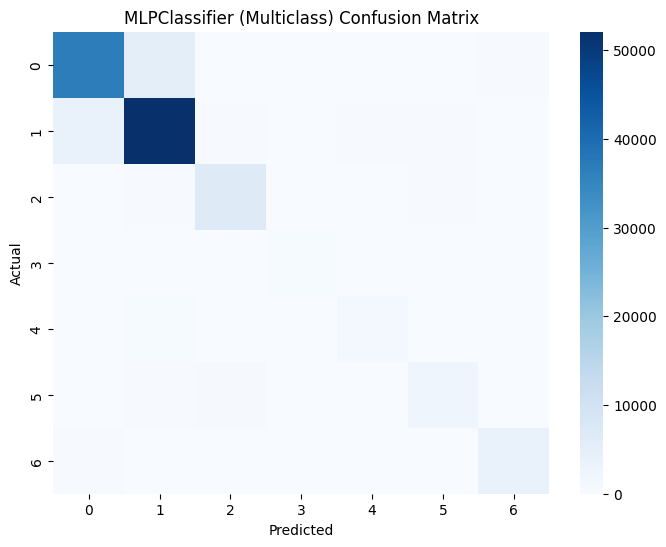

In [15]:
# -----------------------
# MLPClassifier (Multiclass)
# -----------------------
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Pipeline
pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(max_iter=2000))
])

# Parameter grid for tuning
param_grid_mlp = {
    'clf__hidden_layer_sizes': [(256,), (128,), (64,)],
    'clf__early_stopping': [True],
    'clf__activation': ['relu'],
    'clf__solver': ['adam']
}

# Use macro F1 for multiclass
gs_mlp = GridSearchCV(
    estimator=pipe_mlp,
    param_grid=param_grid_mlp,
    cv=cv,
    scoring='f1_macro',       # IMPORTANT for multiclass evaluation
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch
gs_mlp.fit(X_train, y_train)

print("\n=== MLPClassifier (Multiclass) ===")
print("Best CV score:", gs_mlp.best_score_)
print("Best params:", gs_mlp.best_params_)


evaluate_model(
    estimator=gs_mlp.best_estimator_,
    X_test=X_test,
    y_test=y_test,
    name="MLPClassifier (Multiclass)"
)


### **Neural Network With Different Activation Functions**

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,479 (224.53 KB)

 Trainable params: 56,583 (221.03 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30
1544/1544 - 12s - 8ms/step - accuracy: 0.7074 - loss: 0.7455 - val_accuracy: 0.7659 - val_loss: 0.5479
Epoch 2/30
1544/1544 - 10s - 7ms/step - accuracy: 0.7544 - loss: 0.5760 - val_accuracy: 0.7893 - val_loss: 0.4918
Epoch 3/30
1544/1544 - 10s - 6ms/step - accuracy: 0.7740 - loss: 0.5295 - val_accuracy: 0.8083 - val_loss: 0.4516
Epoch 4/30
1544/1544 - 10s - 6ms/step - accuracy: 0.7878 - loss: 0.4994 - val_accuracy: 0.8207 - val_loss: 0.4226
Epoch 5/30
1544/1544 - 10s - 7ms/step - accuracy: 0.7980 - loss: 0.4777 - val_accuracy: 0.8286 - val_loss: 0.4083
Epoch 6/30
1544/1544 - 12s - 7ms/step - accuracy: 0.8052 - loss: 0.4616 - val_accuracy: 0.8394 - val_loss: 0.3849
Epoch 7/30
1544/1544 - 12s - 7ms/step - accuracy: 0.8102 - loss: 0.4499 - val_accuracy: 0.8464 - val_loss: 0.3726
Epoch 8/30
1544/1544 - 10s - 6ms/step - accuracy: 0.8156 - loss: 0.4390 - val_accuracy: 0.8517 - val_loss: 0.3636
Epoch 9/30
1544/1544 - 10s - 6ms/step - accuracy: 0.8194 - loss: 0.4300 - val_accuracy: 

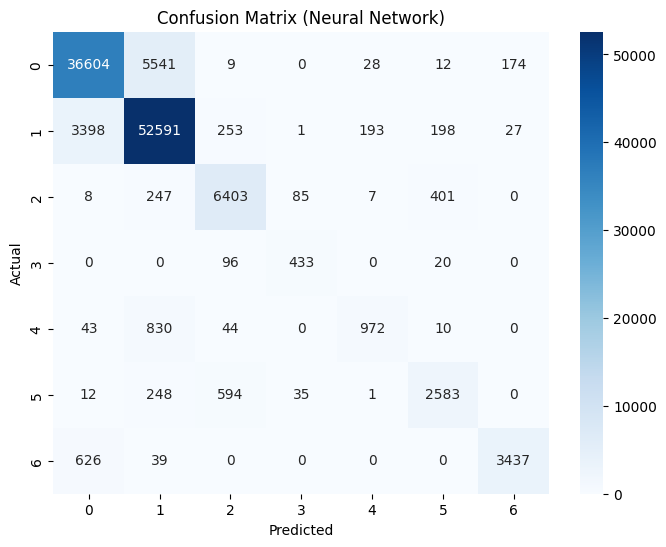

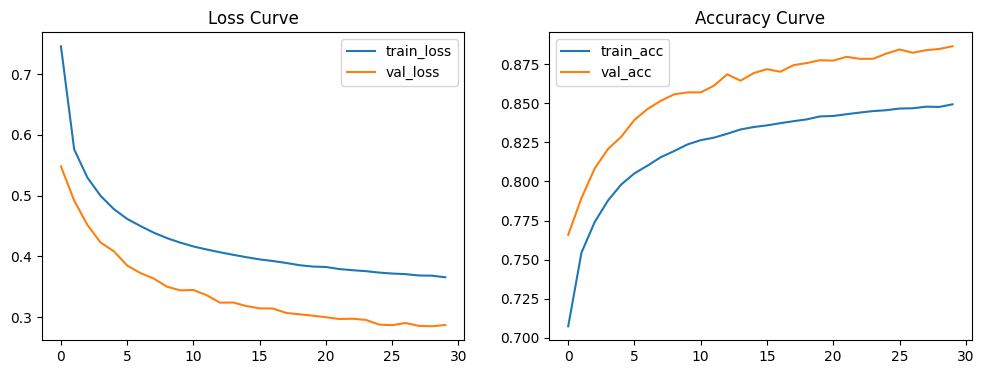

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_features = X_train_scaled.shape[1]   # 55
num_classes = len(y_train.unique())      # 7
y_train_tf = y_train - 1
y_test_tf = y_test - 1


model = keras.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ----------------------------
# TRAIN THE MODEL
# ----------------------------
history = model.fit(
    X_train_scaled,
    y_train_tf,
    validation_split=0.15,
    epochs=30,
    batch_size=256,
    verbose=2
)

# ----------------------------
# EVALUATE THE MODEL
# ----------------------------
y_proba = model.predict(X_test_scaled)
y_pred = np.argmax(y_proba, axis=1)

print("\nTest Accuracy:", accuracy_score(y_test_tf, y_pred))
print("F1 Score (macro):", f1_score(y_test_tf, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test_tf, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test_tf, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Neural Network)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------
# TRAINING CURVE PLOTS
# ----------------------------
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy Curve")
plt.legend()

plt.show()
